### 🎯 Pregunta principal
### ¿Existen características clínicas que diferencien a las personas con y sin enfermedad cardíaca?

In [26]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") #estilo bonito para gráficos

# Etiquetas en español para visualización
labels_es = {
    "age": "Edad",
    "sex": "Sexo",
    "chest_pain": "Tipo de dolor en el pecho",
    "rest_bp": "Presión arterial en reposo",
    "serum_chol": "Colesterol sérico",
    "blood_sugar": "Azúcar en sangre",
    "rest_ecg": "Electrocardiograma en reposo",
    "max_heart_rate": "Frecuencia cardíaca máxima",
    "exercise_ang": "Angina inducida por ejercicio",
    "oldpeak": "Depresión del ST",
    "slope": "Pendiente del ST",
    "major_vessels": "Número de vasos principales",
    "thal": "Resultado de prueba Thal",
    "heart_disease": "Enfermedad cardíaca"
}

### 1. Cargar la copia limpia del dataset (df_clean)

In [3]:
df = pd.read_csv("../data/processed/heart_disease_clean.csv")

### 2. Análisis Univariada - Estadísticas descriptivas

#### 2.1 Variables cuantitativas
###### Datos presentados en tabla.

In [ ]:
# Visualización de distribuición de las variables cuantitativas en tabla
df[['age', 'rest_bp', 'serum_chol', 'max_heart_rate']].describe()

,age,rest_bp,serum_chol,max_heart_rate
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778
std,9.109067,17.861608,51.686237,23.165717
min,29.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,213.000000,133.000000
50%,55.000000,130.000000,245.000000,153.500000
75%,61.000000,140.000000,280.000000,166.000000
max,77.000000,200.000000,564.000000,202.000000


##### 2.1.1 Representación gráfica de las variables con distribuición simétrica (o casi) y sin outliers
###### He optado por usar histogramas con media y desviación estándar, para representar la distibuición de los datos.

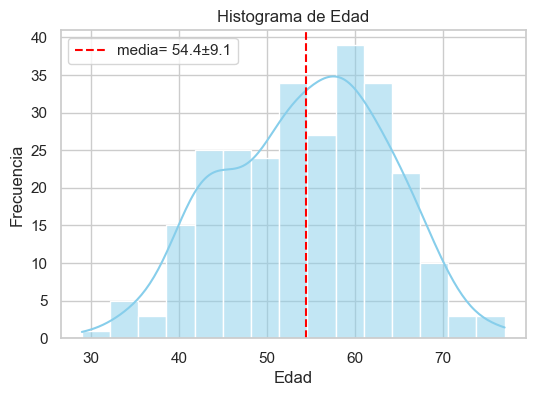

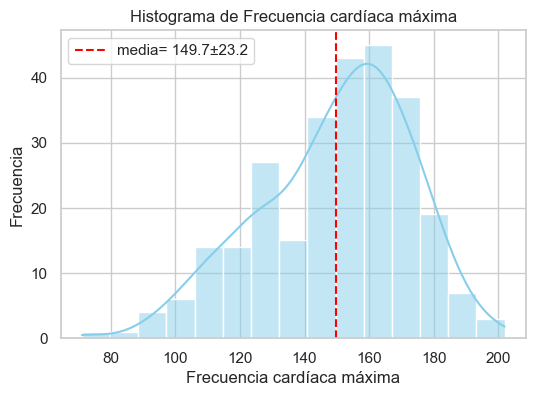

In [28]:
# Histogramas con Media ± Desviación Estándar
for col in ['age', 'max_heart_rate']:
    mean = df[col].mean()
    std = df[col].std()
    
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.axvline(mean, color='red', linestyle='--', label=f'media= {mean:.1f}±{std:.1f}')
    plt.title(f'Histograma de {labels_es[col]}')
    plt.xlabel(labels_es[col])
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

##### 2.1.2 Representación gráfica de las variables con distribuición assimétrica y/o con outliers
###### He optado por usar boxplot con los percentiles (25%, 50%, 75%), para representar la distibuición de los datos.

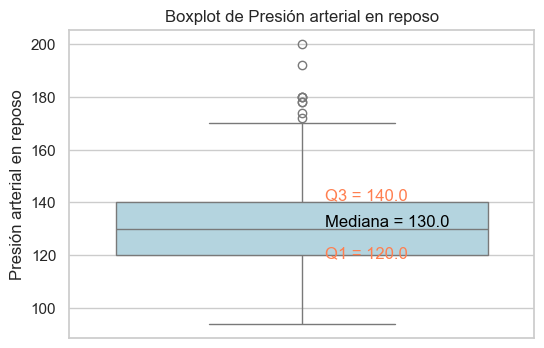

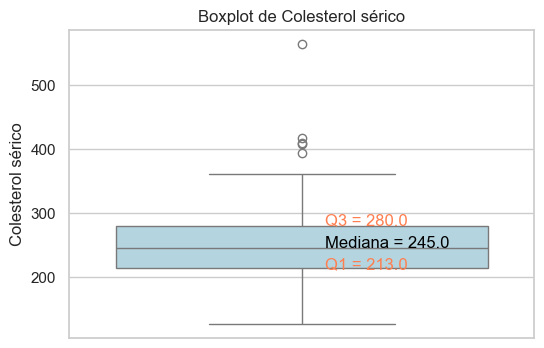

In [30]:
 
# Boxplots con Mediana + Percentiles (Q1-Q3)

for col in ['rest_bp', 'serum_chol']:
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot de {labels_es[col]}')
    
    # Añadir líneas de mediana y percentiles en el gráfico
    plt.text(0.05, median + 1, f'Mediana = {median}', color='black')
    plt.text(0.05, q1 - 1, f'Q1 = {q1}', color='coral')
    plt.text(0.05, q3 + 1, f'Q3 = {q3}', color='coral')
    
    plt.ylabel(labels_es[col])
    plt.show()

#### 2.2 Variables cualitativas
###### Datos presentados en tabla.

In [ ]:
# Visualización de distribuición de las variables cuanlitativas en tabla con valores absolutos (n) y relativos(%).
categorical_cols = [
    "sex",
    "chest_pain",
    "exercise_ang",
    "heart_disease"
]

value_labels = {
    "sex": {0: "Mujer", 1: "Hombre"},
    "exercise_ang": {0: "No", 1: "Sí"},
    "heart_disease": {1: "No", 2: "Sí"},
    "chest_pain": {
        1: "Angina típica",
        2: "Angina atípica",
        3: "Dolor no anginoso",
        4: "Asintomático"
    }
}

# Esta función: recorre cada variable, traduce los valores, calcula n y %, devuelve una sola tabla
def tabla_categoricas_unificada(df, categorical_cols, value_labels):
    tablas = []

    for col in categorical_cols:
        # Conteos
        conteo = df[col].value_counts().reset_index()
        conteo.columns = ["codigo", "n"]
        conteo["%"] = (conteo["n"] / conteo["n"].sum() * 100).round(2)

        # Etiquetas humanas
        if col in value_labels:
            conteo["Categoria"] = conteo["codigo"].map(value_labels[col])
        else:
            conteo["Categoria"] = conteo["codigo"]

        conteo["Variable"] = col

        tablas.append(
            conteo[["Variable", "Categoria", "n", "%"]]
        )

    return pd.concat(tablas, ignore_index=True)

# Genera la tabla final
tabla_cat = tabla_categoricas_unificada(
    df,
    categorical_cols=categorical_cols,
    value_labels=value_labels
)

tabla_cat["Variable"] = tabla_cat["Variable"].map(labels_es) # usa los rótulos en español para las variables
display(tabla_cat)

,Variable,Categoria,n,%
0,Sexo,Hombre,183,67.78
1,Sexo,Mujer,87,32.22
2,Tipo de dolor en el pecho,Asintomático,129,47.78
3,Tipo de dolor en el pecho,Dolor no anginoso,79,29.26
4,Tipo de dolor en el pecho,Angina atípica,42,15.56
5,Tipo de dolor en el pecho,Angina típica,20,7.41
6,Angina inducida por ejercicio,No,181,67.04
7,Angina inducida por ejercicio,Sí,89,32.96
8,Enfermedad cardíaca,No,150,55.56
9,Enfermedad cardíaca,Sí,120,44.44


##### 2.2.1 Representación gráfica de distribuición de las variables cualitativas
###### He optado por usar gráfico pie para variables binarias con valores relativos (%).

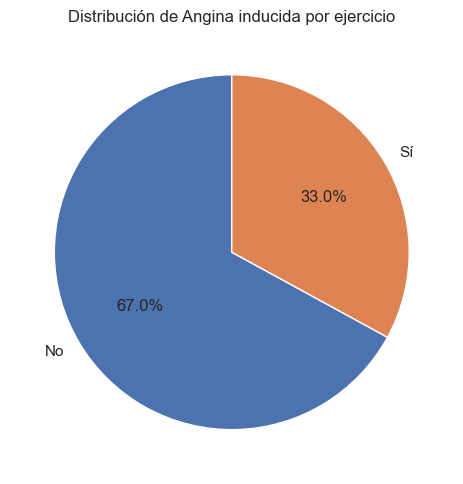

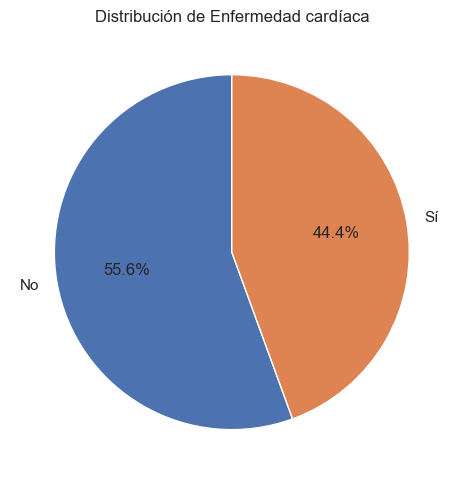

In [ ]:
# Gráficos tipo pie da distribuición de las variables cualitativas.
def pie_chart(tabla, variable):
    data = tabla[tabla["Variable"] == variable]

    plt.figure(figsize=(5,5))
    plt.pie(
        data["%"],
        labels=data["Categoria"],
        autopct="%.1f%%",
        startangle=90
    )
    plt.title(f"Distribución de {variable}")
    plt.tight_layout()
    plt.show()

pie_chart(tabla_cat, "Angina inducida por ejercicio")
pie_chart(tabla_cat, "Enfermedad cardíaca")

##### 2.2.2 Representación gráfica de distribuición de las variables cualitativas
###### He optado por usar gráfico barra con valores absoluto.

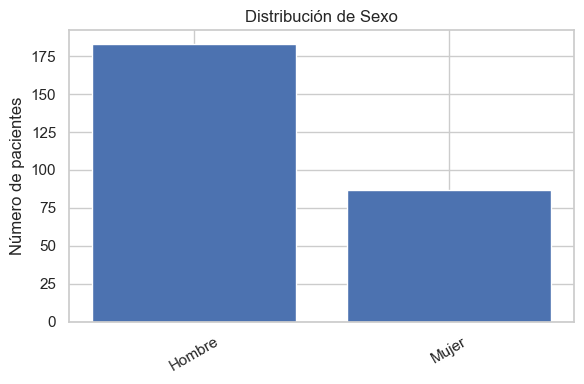

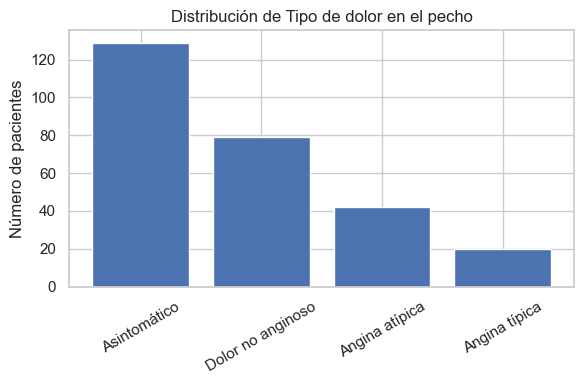

In [ ]:
# Gráficos do tipo barra para variables cualitativas
def bar_chart(tabla, variable):
    data = tabla[tabla["Variable"] == variable]

    plt.figure(figsize=(6,4))
    plt.bar(data["Categoria"], data["n"])
    plt.title(f"Distribución de {variable}")
    plt.xlabel("")
    plt.ylabel("Número de pacientes")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

bar_chart(tabla_cat, "Sexo")
bar_chart(tabla_cat, "Tipo de dolor en el pecho")

### 3. Análisis Bivariada
###### Se realizó un análisis bivariado utilizando gráficos de cajas y tablas de contingencia para evaluar la relación entre variables clínicas y la presencia de enfermedad cardíaca. Además, se exploraron las correlaciones entre variables numéricas para identificar posibles patrones conjuntos.

##### 3.1 ¿La edad está relacionada con la enfermedad cardíaca?
###### Boxplot: age vs heart_disease

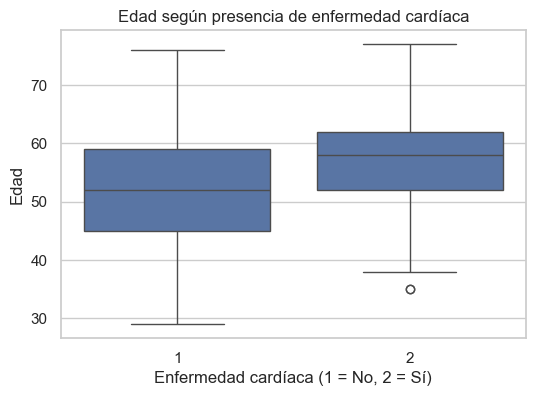

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="heart_disease",
    y="age"
)
plt.title("Edad según presencia de enfermedad cardíaca")
plt.xlabel("Enfermedad cardíaca (1 = No, 2 = Sí)")
plt.ylabel("Edad")
plt.show()

##### 3.2 ¿El tipo de dolor en el pecho se asocia con la enfermedad?
###### Boxplot: chest_pain vs heart_disease

In [39]:
tabla_cp = pd.crosstab(
    df["chest_pain"],
    df["heart_disease"],
    normalize="index"
) * 100

tabla_cp

heart_disease,1,2
chest_pain,,
1.0,75.000000,25.000000
2.0,83.333333,16.666667
3.0,78.481013,21.518987
4.0,29.457364,70.542636


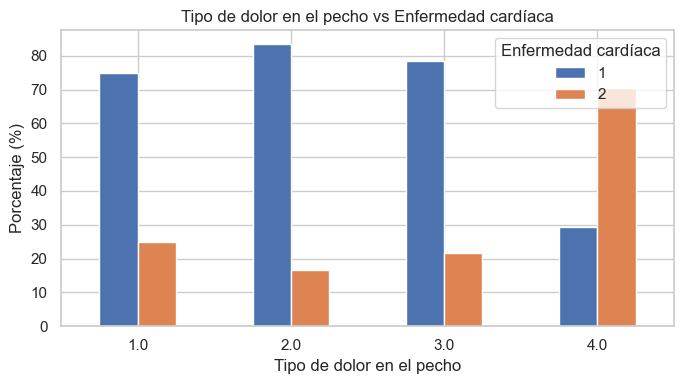

In [40]:
tabla_cp.plot(kind="bar", figsize=(7,4))
plt.title("Tipo de dolor en el pecho vs Enfermedad cardíaca")
plt.xlabel("Tipo de dolor en el pecho")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Enfermedad cardíaca")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 3.3 ¿La frecuencia cardíaca máxima difiere entre sanos y enfermos?
###### Boxplot: max_heart_rate vs heart_disease

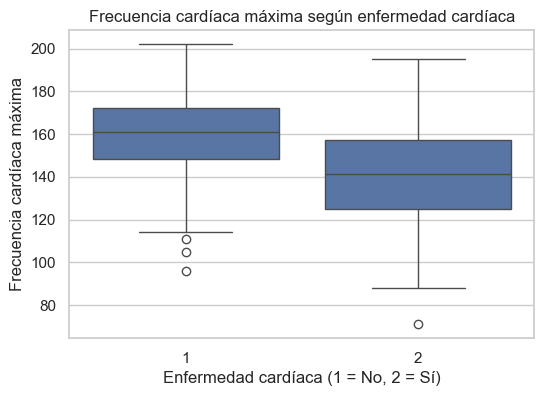

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="heart_disease",
    y="max_heart_rate"
)
plt.title("Frecuencia cardíaca máxima según enfermedad cardíaca")
plt.xlabel("Enfermedad cardíaca (1 = No, 2 = Sí)")
plt.ylabel("Frecuencia cardíaca máxima")
plt.show()

##### 3.4 ¿La angina inducida por ejercicio está asociada con enfermedad?
###### Boxplot: exercise_ang vs heart_disease

In [43]:
# Tabla cruzada
tabla_ang = pd.crosstab(
    df["exercise_ang"],
    df["heart_disease"],
    normalize="index"
) * 100

tabla_ang

heart_disease,1,2
exercise_ang,,
0.0,70.165746,29.834254
1.0,25.842697,74.157303


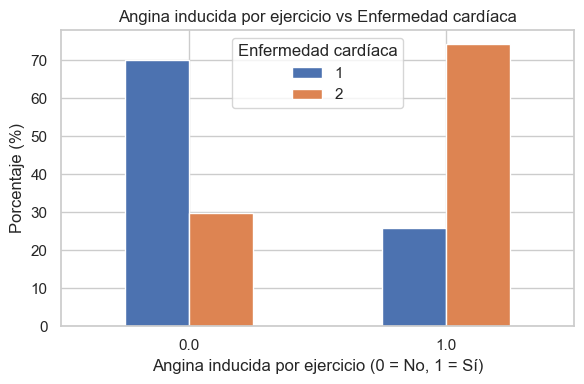

In [44]:
# Gráfico
tabla_ang.plot(kind="bar", figsize=(6,4))
plt.title("Angina inducida por ejercicio vs Enfermedad cardíaca")
plt.xlabel("Angina inducida por ejercicio (0 = No, 1 = Sí)")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Enfermedad cardíaca")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 3.5 ¿El colesterol diferencia a sanos y enfermos?
###### Boxplot: serum_chol vs heart_disease

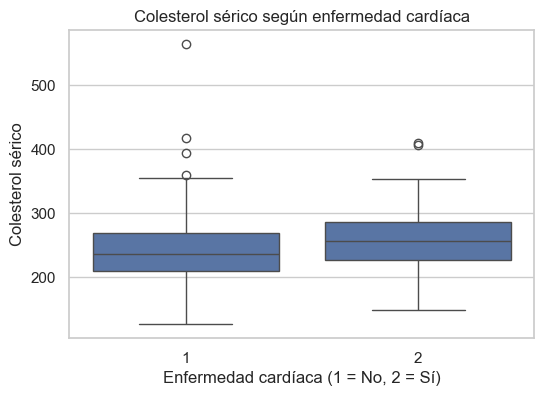

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="heart_disease",
    y="serum_chol"
)
plt.title("Colesterol sérico según enfermedad cardíaca")
plt.xlabel("Enfermedad cardíaca (1 = No, 2 = Sí)")
plt.ylabel("Colesterol sérico")
plt.show()

##### 3.6 ¿La presión arterial en reposo está relacionada?
###### Boxplot: rest_bp vs heart_disease

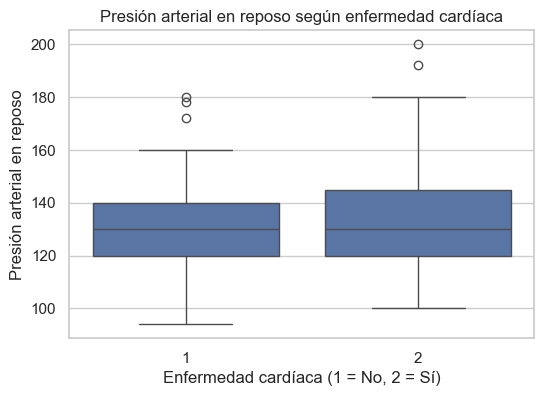

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="heart_disease",
    y="rest_bp"
)
plt.title("Presión arterial en reposo según enfermedad cardíaca")
plt.xlabel("Enfermedad cardíaca (1 = No, 2 = Sí)")
plt.ylabel("Presión arterial en reposo")
plt.show()

##### 3.7 Mapa de correlaciones entre variables numérica

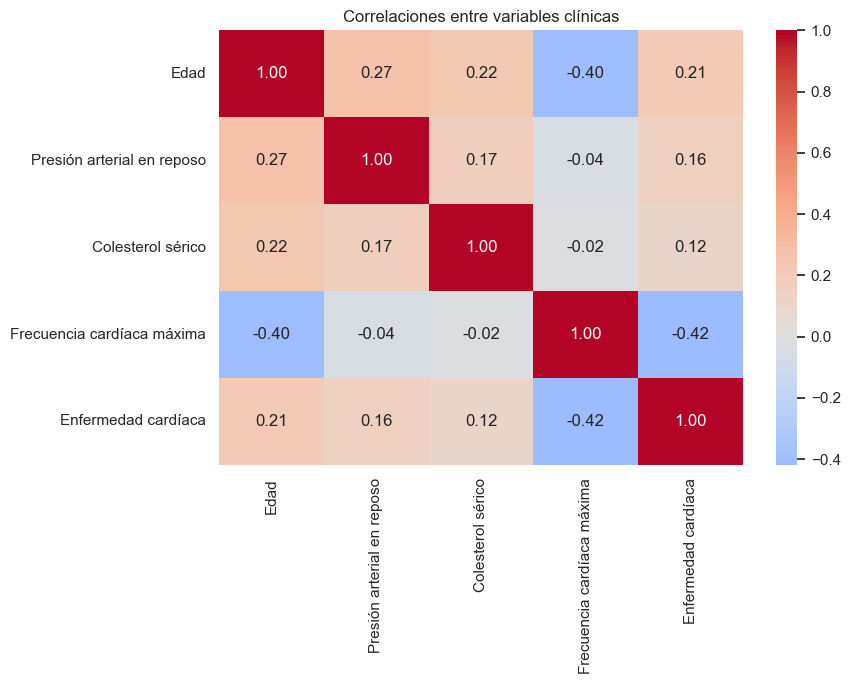

In [50]:
#Heatmap de correlaciones
vars_heatmap = [
    "age",
    "rest_bp",
    "serum_chol",
    "max_heart_rate",
    "heart_disease"
]

corr = df[vars_heatmap].corr()
corr.rename(
    index=labels_es,
    columns=labels_es,
    inplace=True
)

plt.figure(figsize=(9,7))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlaciones entre variables clínicas")
plt.tight_layout()